In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from scipy.special import softmax
from cleanlab.rank import get_label_quality_scores
from sklearn.neighbors import KernelDensity
from utils import (
    master_dataframe,
    create_metricwise_dict,
    draw_dot_plot,
)

In [3]:
all_metrics=pickle.load( open("All_metrics.pkl","rb"))

In [4]:
full_dataset = master_dataframe(all_metrics)
full_dataset.head(2)

,dataset,scoring_method,model,dataset_num_samples,dataset_num_errors,auroc,auprc,lift_at_num_errors,lift_at_100,spearman_corr,precision,recall,fpr,tpr
0,airquality_co,residual,LightGBM,3156,365,0.629032,0.245378,2.297857,3.458630,0.079240,"[0.11635320369780044, 0.11607142857142858, 0.1...","[1.0, 0.9972602739726028, 0.9972602739726028, ...","[0.0, 0.0, 0.0, 0.00035829451809387314, 0.0003...","[0.0, 0.0027397260273972603, 0.016438356164383..."
1,airquality_co,residual,LightGBM_BAG_L1,3156,365,0.836123,0.602844,4.903674,7.695452,0.482255,"[0.11590981263893299, 0.1156289707750953, 0.11...","[1.0, 0.9972602739726028, 0.9972602739726028, ...","[0.0, 0.0, 0.0, 0.00035829451809387314, 0.0003...","[0.0, 0.0027397260273972603, 0.057534246575342..."


In [6]:
# extract metric-wise dictionary, this is used to generate plot having specific metric plotted for all the dataset and models. 
metrics_considered = [
    "auroc",
    "auprc",
    "lift_at_num_errors",
    "lift_at_100",
    "spearman_corr",
]
metric_based_dict = create_metricwise_dict(
    full_dataset, list_of_metrics=metrics_considered
)
print(metric_based_dict.keys())

dict_keys(['auroc', 'auprc', 'lift_at_num_errors', 'lift_at_100', 'spearman_corr'])


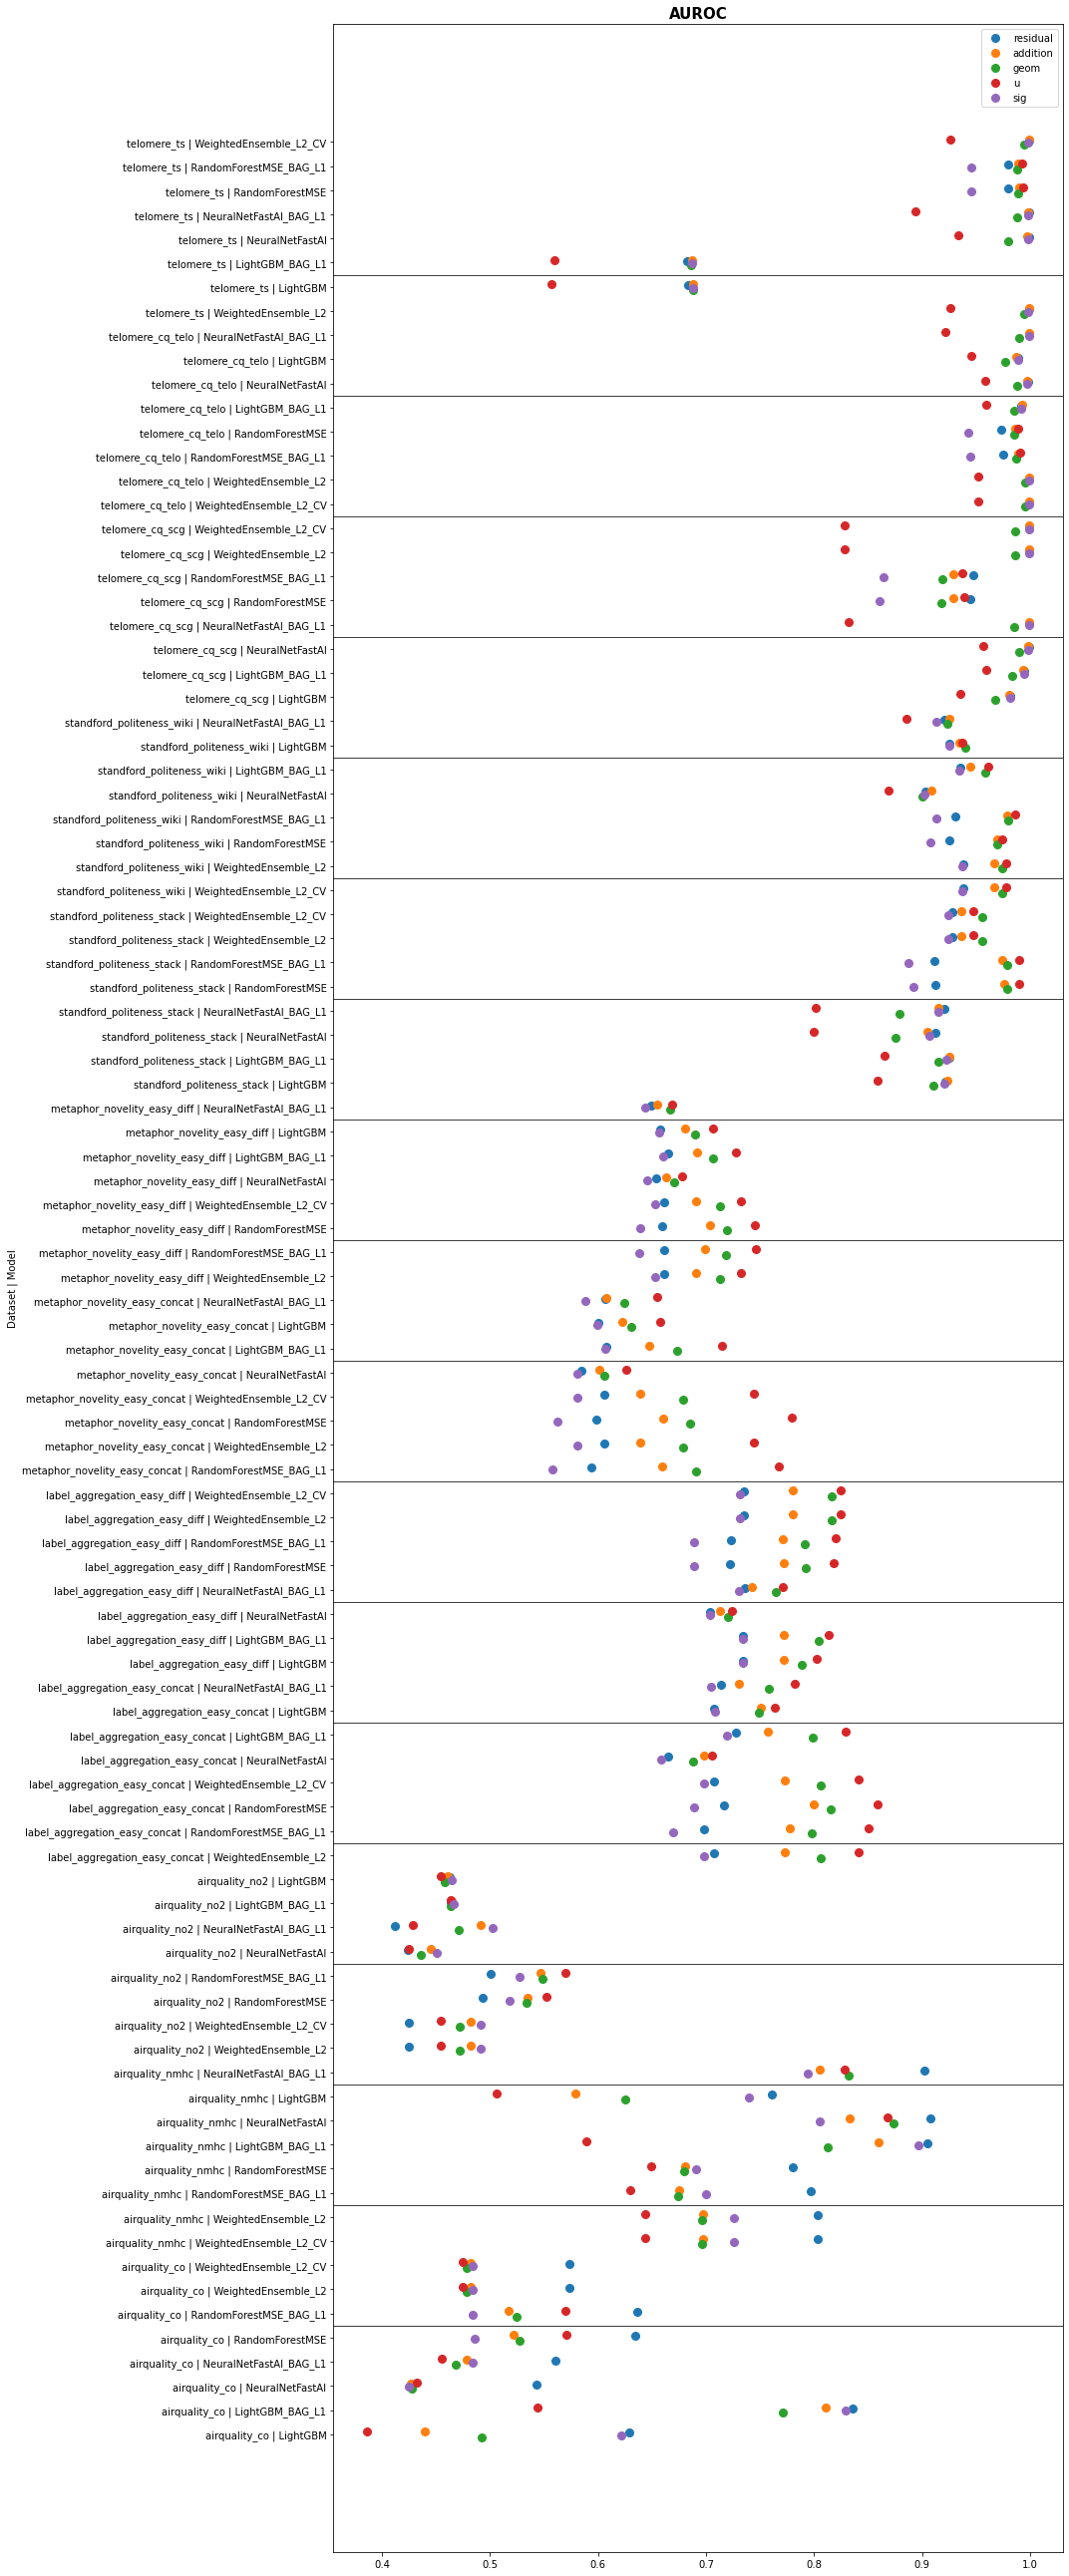

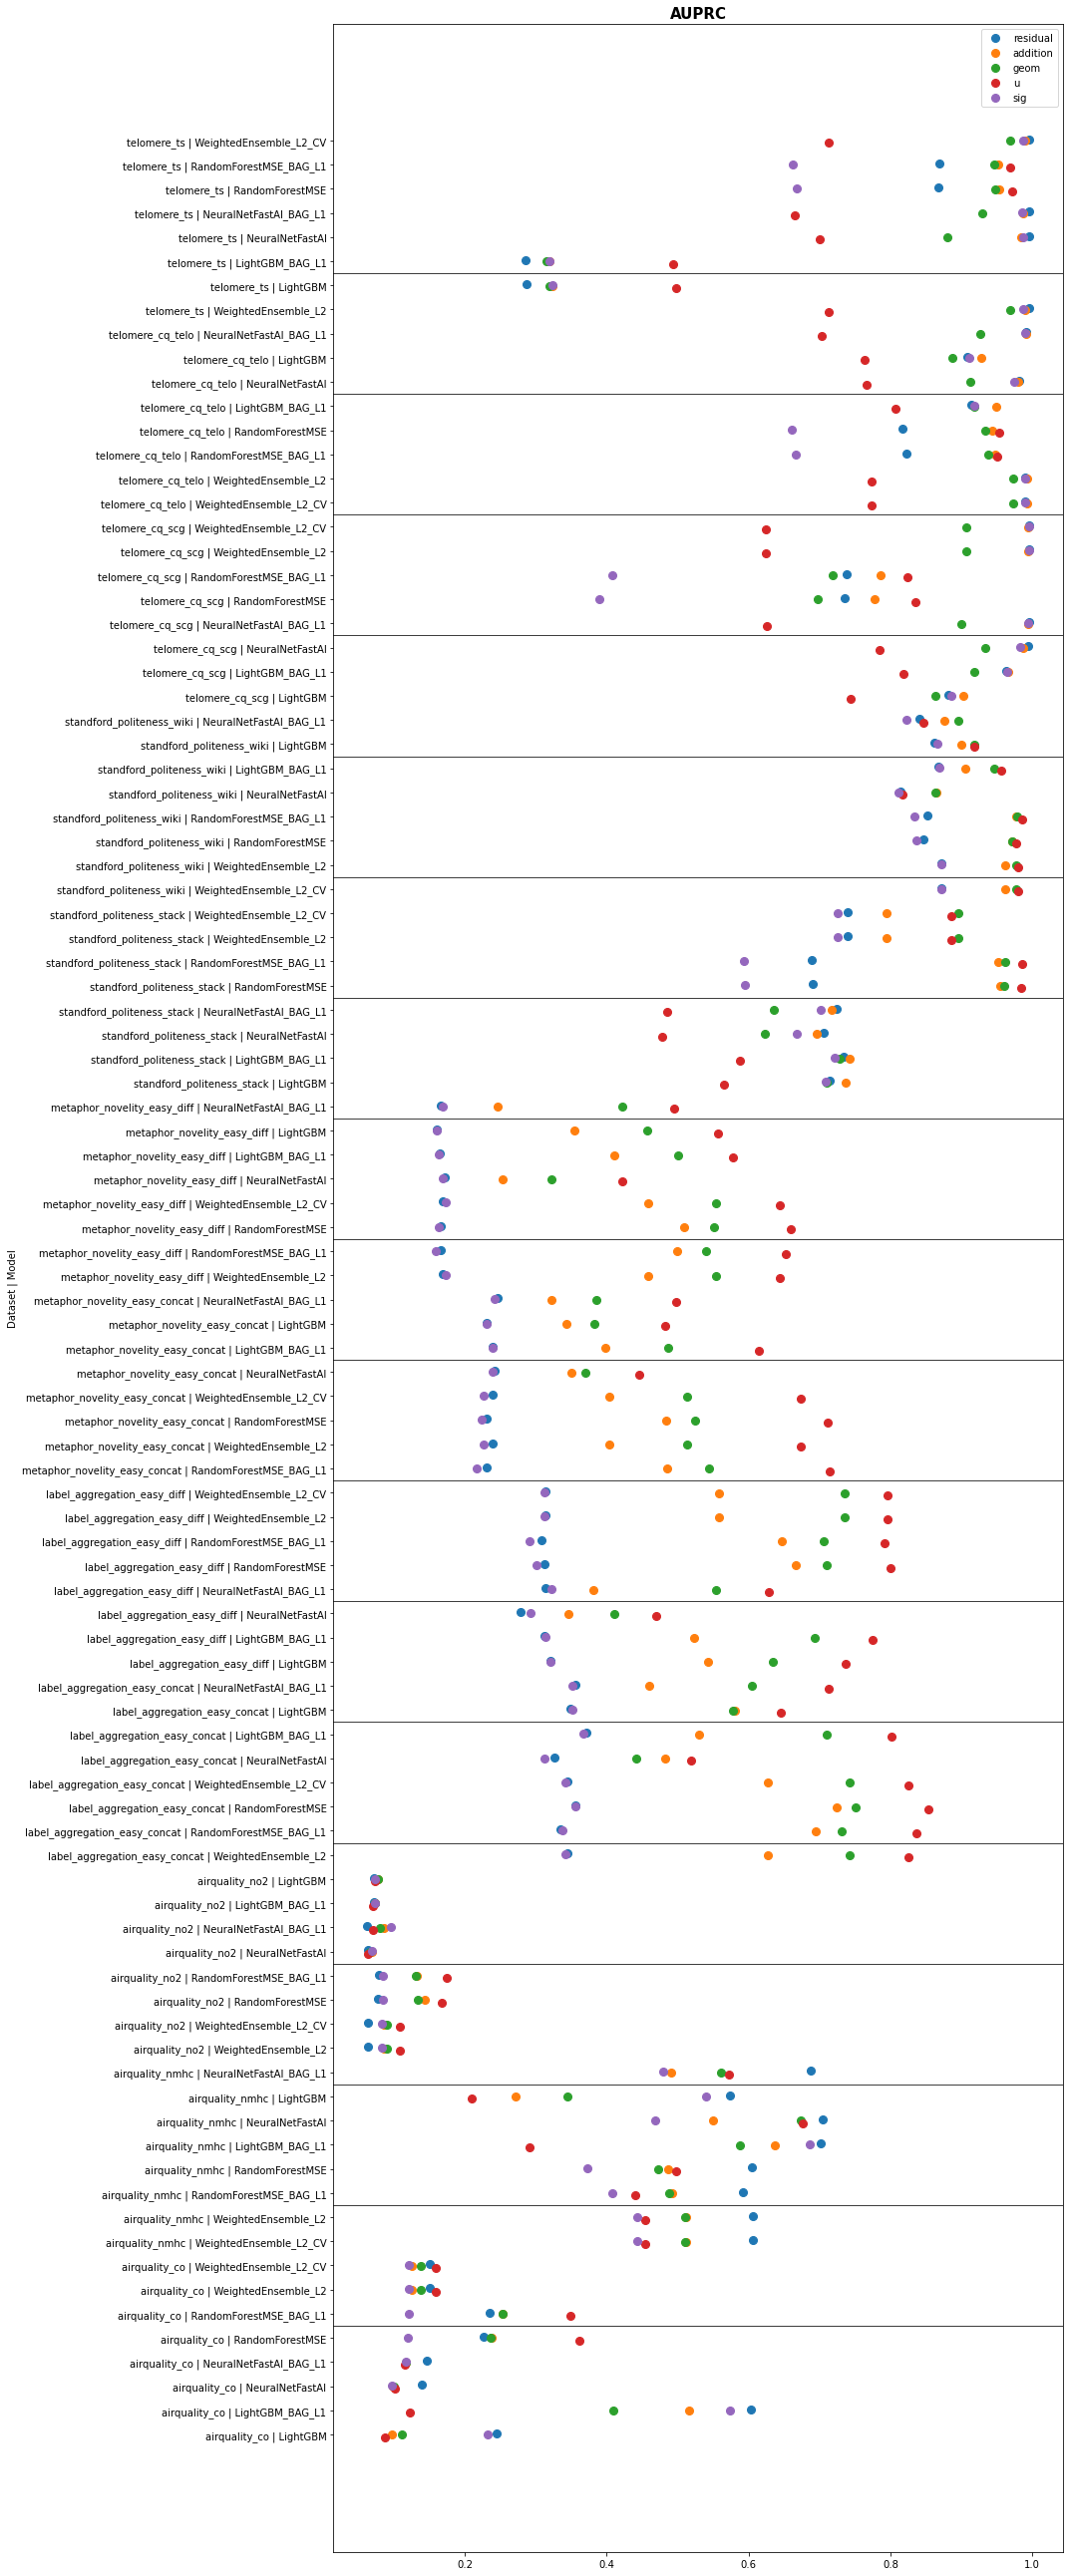

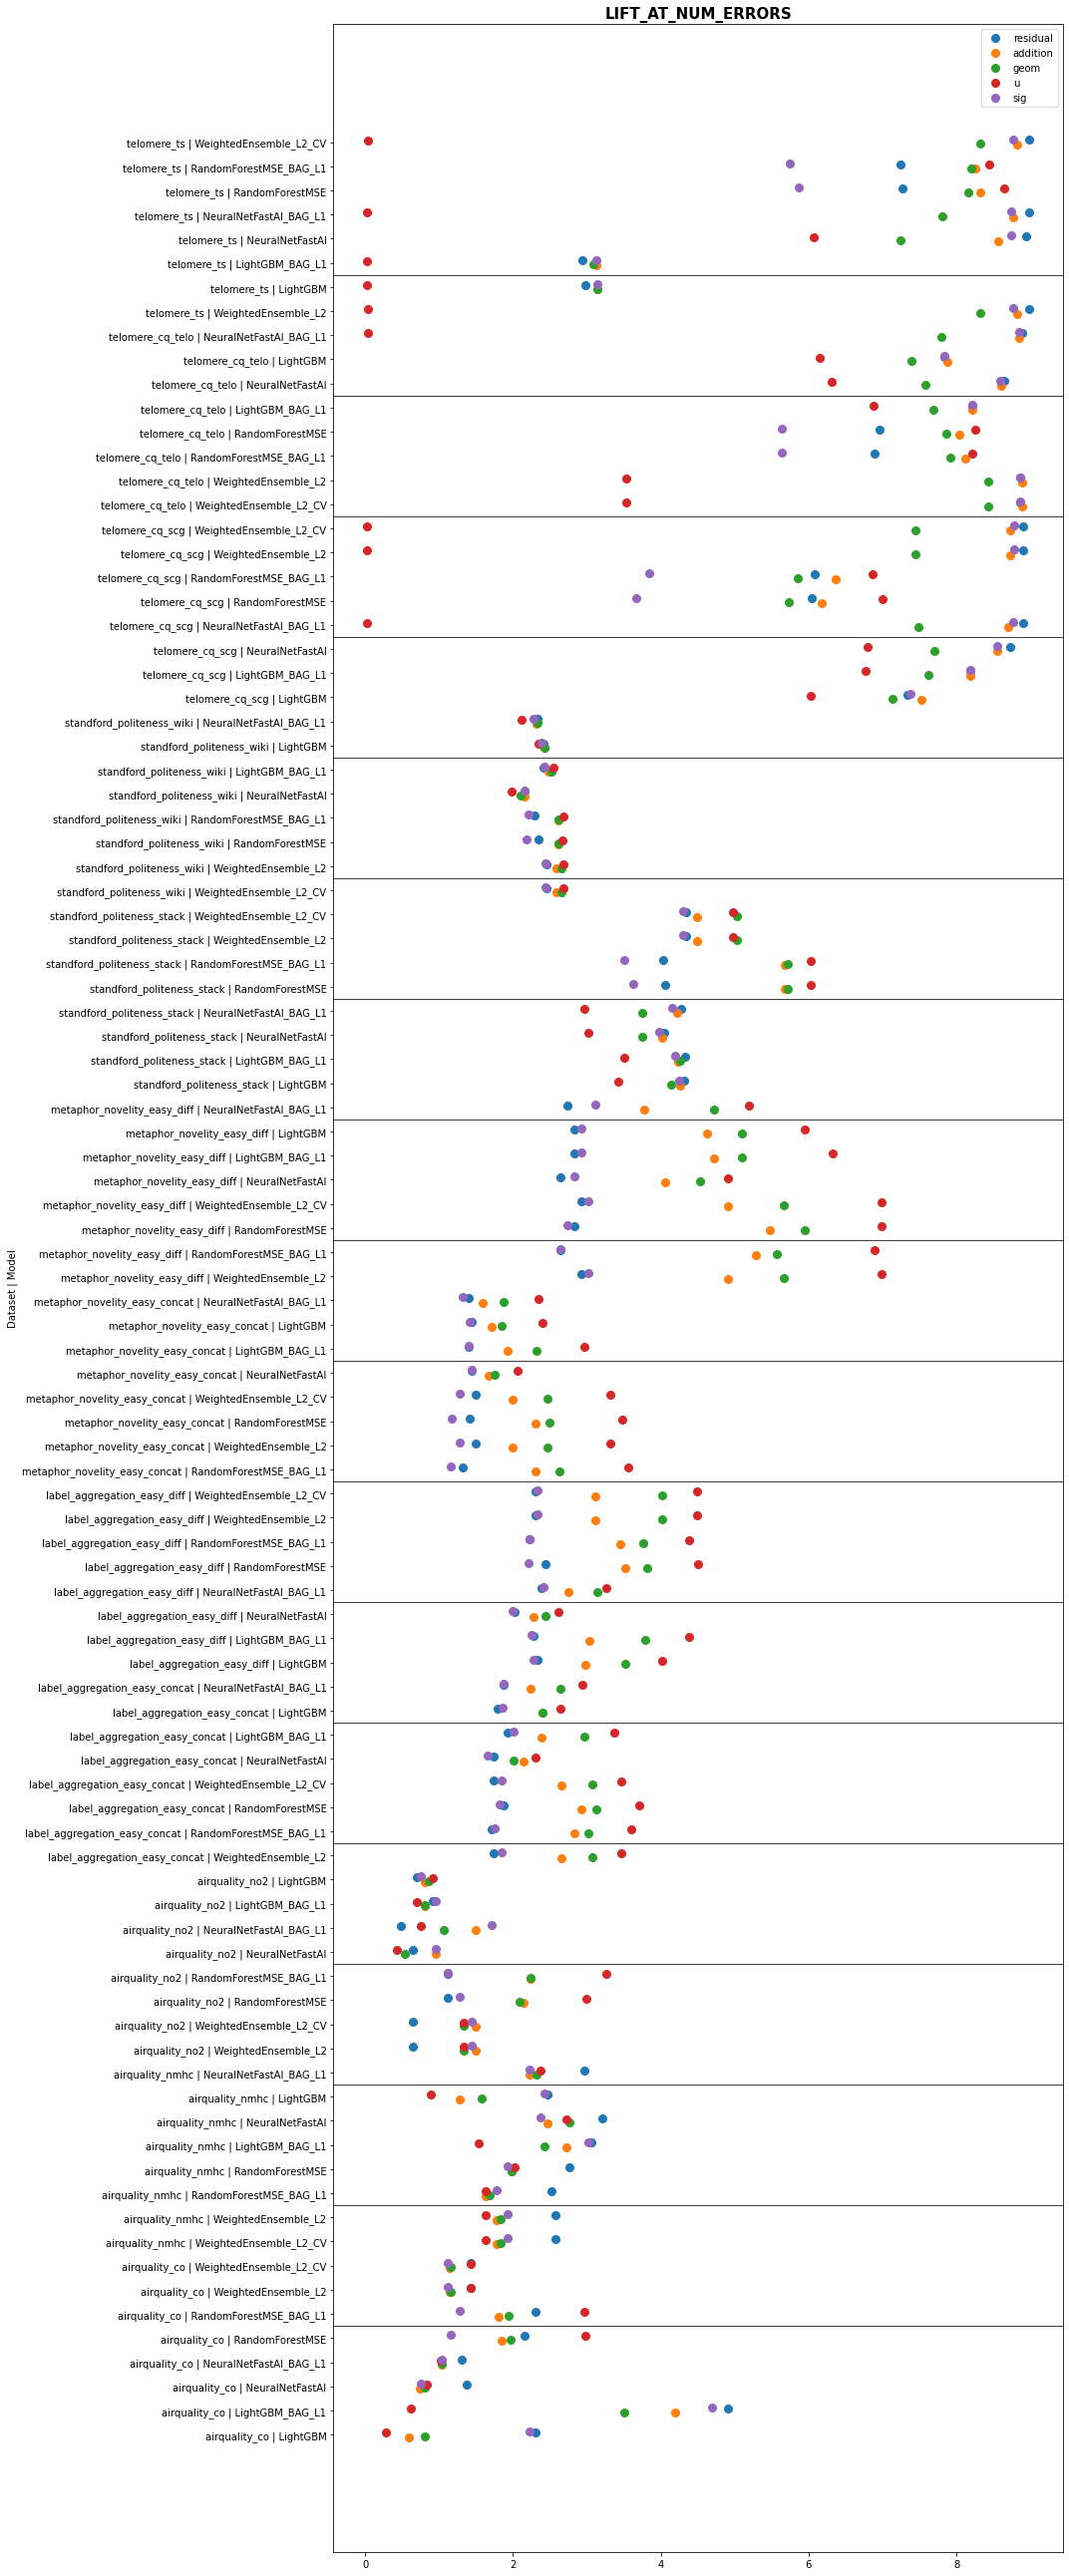

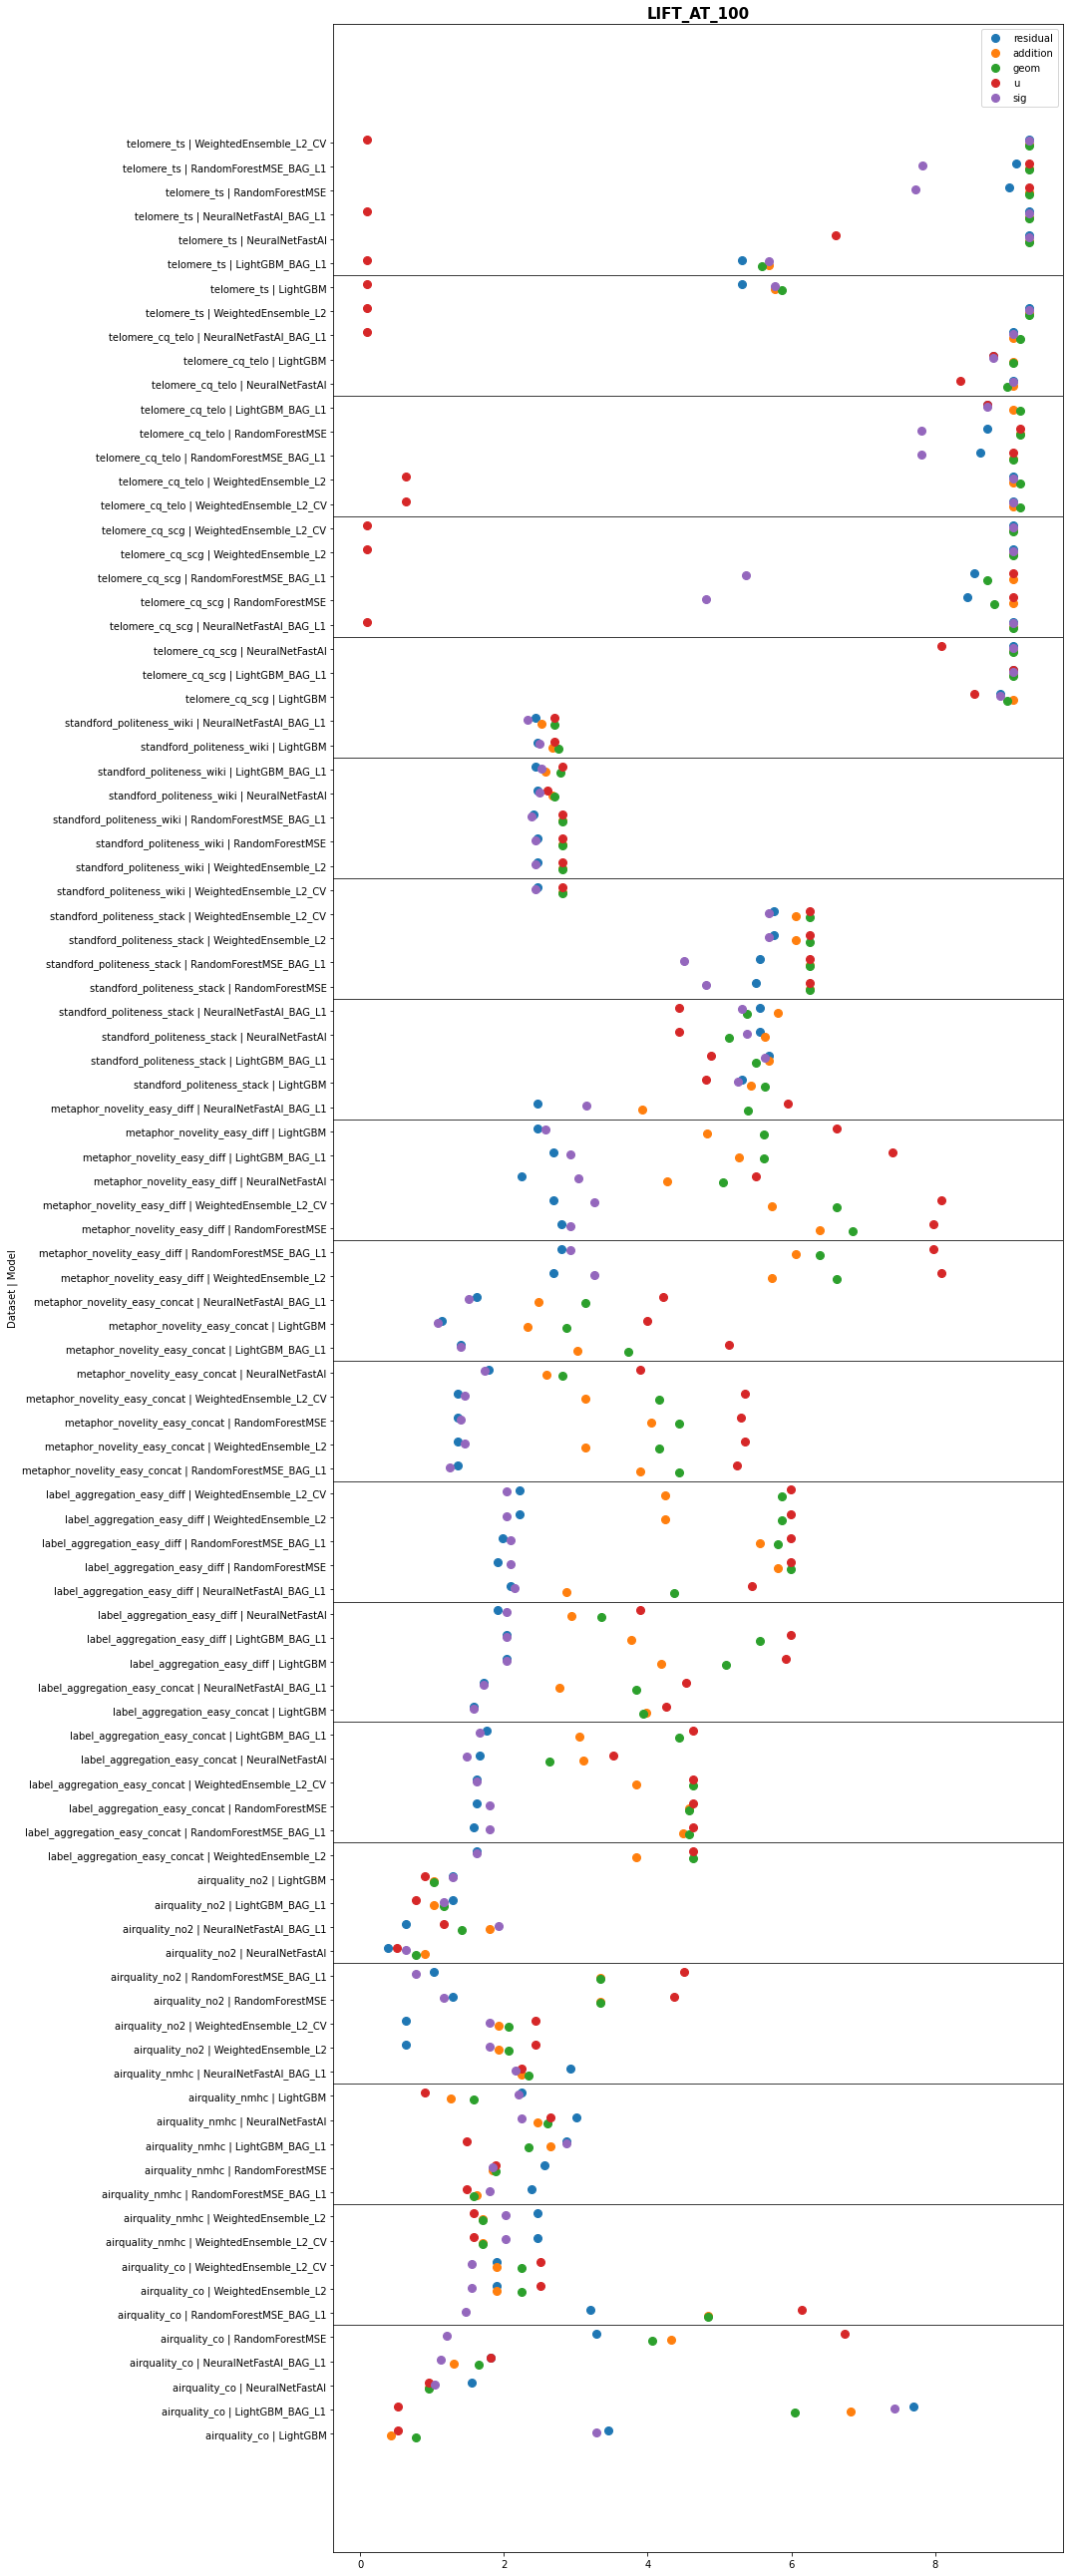

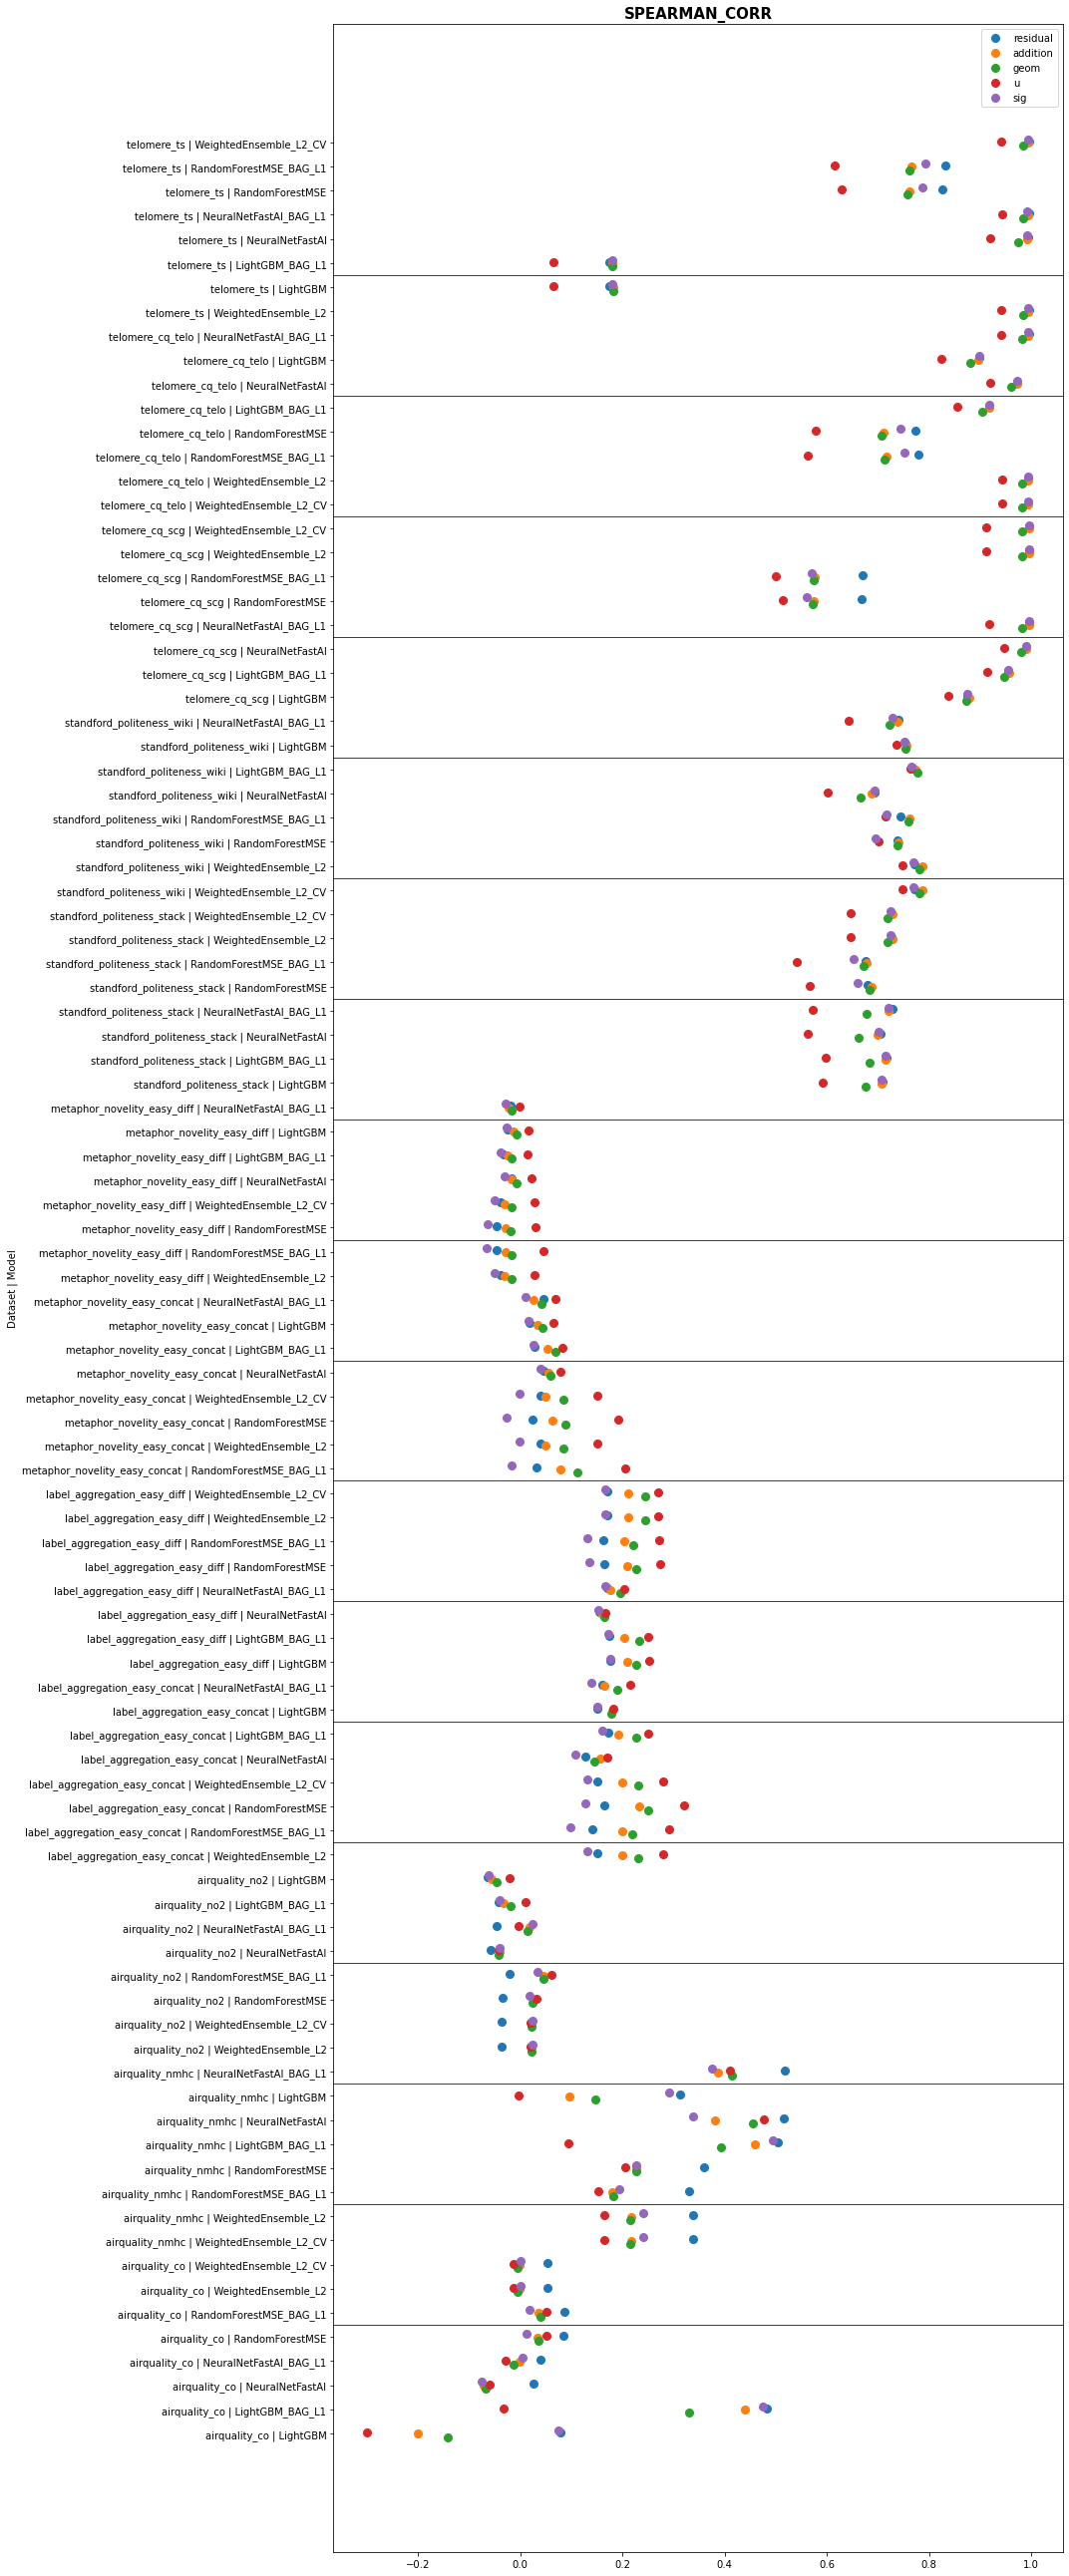

In [9]:
# Based on number of dataset to be plotted, consider changing the "figsize" argument. 
scoring_methods = ["residual", "addition","geom","u","sig"]
for metric in metrics_considered:
    draw_dot_plot(
        metric_based_dict[metric],
        scores_considered=scoring_methods,
        title=metric.upper(),
        figsize=(15, 3*len(all_metrics)),
    )